In [61]:
#Libraries
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import decomposition

In [62]:
df_MP=pd.read_csv('marketplace.csv')
df_MP.head()

,date,sku_name,product_id,merchant_code,merchant_badge,product_type,merchant_city,cod,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
0,3/11/2020,HUAWEI NOVA 5T RAM 8GB INTERNAL 128GB,E1,1.0,PM,Huawei nova 5T,Kota Kediri,False,4500000,1,0,0,0,95,37,74
1,3/26/2020,Huawei Nova 5T (8GB/128GB) - Crush Green,F1,2.0,OS,Huawei nova 5T,Kota Administrasi Jakarta Utara,False,4999000,5,0,0,0,0,0,2
2,3/23/2020,HUAWEI NOVA 5T RAM 8/128 GARANSI RESMI HUAWEI ...,F2,3.0,PM,Huawei nova 5T,Kota Administrasi Jakarta Barat,False,4589900,16,0,0,0,96,12,19
3,4/29/2020,HUAWEI NOVA 5T RAM 8/128GB GARANSI RESMI HUAWE...,E2,4.0,OS,Huawei nova 5T,Kota Surabaya,False,4698500,5,0,0,0,99,42,63
4,4/15/2020,nokia 3310 reborn,C1,5.0,RM,Nokia 1,Kab. Bangkalan,True,1000000,999999,0,0,3,100,18,82


<h1>1.Berapa banyak observasi yang ada dalam dataset?dan kolom mana yang tidak memiliki nilai duplikat/nilai unik?</h1>

In [12]:
df_MP.shape

(26014, 15)

In [11]:
dup=df_MP.duplicated()
print(dup.sum())
df_MP[dup]

2220


,sku_name,product_id,merchant_code,merchant_badge,product_type,merchant_city,cod,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
date,,,,,,,,,,,,,,,
4/25/2020,oppo A9 2020 ram 8/128gb garansi resmi,E5,12.0,RM,Oppo A9,Kota Administrasi Jakarta Utara,False,4100000,999959,0,0,1,98,29,45
4/19/2020,[NEW] Oppo A9 2020 8/128 GB Garansi Resmi RAM ...,E7,16.0,RM,Oppo A9,Kota Administrasi Jakarta Barat,False,3575000,840,0,0,14,94,119,261
4/26/2020,hp Oppo a9 2020,F5,17.0,RM,Oppo A9,Kota Administrasi Jakarta Barat,False,4000000,9925,0,0,3,100,32,75
4/28/2020,Oppo F3 Ram 4gb Rom 64gb Garansi Resmi,A2,10.0,RM,Oppo F3,Kota Tangerang Selatan,False,3199000,999999,0,0,2,94,56,91
4/29/2020,Oppo F3 Ram 4gb Rom 64gb Garansi Resmi,A2,10.0,RM,Oppo F3,Kota Tangerang Selatan,False,3199000,999999,0,0,2,94,56,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/17/2020,XIAOMI REDMI NOTE 7 RAM 4GB INTERNAL 64GB 4/64...,D2319,829.0,OS,Xiaomi Redmi Note 7,Kota Administrasi Jakarta Barat,False,2650000,7,0,0,6,99,91,141
4/4/2020,XIAOMI REDMI NOTE 8 Pro NOTE8 6GB 128GB 6 128 ...,F339,4239.0,OS,Xiaomi Redmi Note 6 Pro,Kota Administrasi Jakarta Barat,False,3699000,76,0,0,11,100,8,24
4/7/2020,Asus Zenfone 3 Max ZC520TL - 4G LTE - 2GB/32GB...,A287,843.0,OS,Asus Zenfone 3 Max ZC520TL,Kota Administrasi Jakarta Pusat,False,1580000,7,0,0,25,100,6,8


In [18]:
any(df_MP['sku_name'].duplicated())

True

In [19]:
any(df_MP['product_id'].duplicated())

True

In [21]:
any(df_MP['merchant_city'].duplicated())

True

In [24]:
any(df_MP['product_type'].duplicated())

True

<h1>2.Periksa tipe data dalam dataset,lakukanlah beberapa perubahan tipe data jika ada tipe data yang salah</h1>

In [26]:
df_MP.dtypes

sku_name           object
product_id         object
merchant_code     float64
merchant_badge     object
product_type       object
merchant_city      object
cod                  bool
price               int64
stock               int64
daily_gmv           int64
daily_sold          int64
daily_view          int64
rating              int64
total_review        int64
total_sold          int64
dtype: object

In [33]:
df_MP['date']=df_MP['date'].astype('datetime64')
df_MP.dtypes

date              datetime64[ns]
sku_name                  object
product_id                object
merchant_code            float64
merchant_badge            object
product_type              object
merchant_city             object
cod                         bool
price                      int64
stock                      int64
daily_gmv                  int64
daily_sold                 int64
daily_view                 int64
rating                     int64
total_review               int64
total_sold                 int64
dtype: object

In [34]:
df_MP.head()

,date,sku_name,product_id,merchant_code,merchant_badge,product_type,merchant_city,cod,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
0,2020-03-11,HUAWEI NOVA 5T RAM 8GB INTERNAL 128GB,E1,1.0,PM,Huawei nova 5T,Kota Kediri,False,4500000,1,0,0,0,95,37,74
1,2020-03-26,Huawei Nova 5T (8GB/128GB) - Crush Green,F1,2.0,OS,Huawei nova 5T,Kota Administrasi Jakarta Utara,False,4999000,5,0,0,0,0,0,2
2,2020-03-23,HUAWEI NOVA 5T RAM 8/128 GARANSI RESMI HUAWEI ...,F2,3.0,PM,Huawei nova 5T,Kota Administrasi Jakarta Barat,False,4589900,16,0,0,0,96,12,19
3,2020-04-29,HUAWEI NOVA 5T RAM 8/128GB GARANSI RESMI HUAWE...,E2,4.0,OS,Huawei nova 5T,Kota Surabaya,False,4698500,5,0,0,0,99,42,63
4,2020-04-15,nokia 3310 reborn,C1,5.0,RM,Nokia 1,Kab. Bangkalan,True,1000000,999999,0,0,3,100,18,82


<h1>3.Apakah ada nilai dalam variabel yang nol?yang mana jika ada beberapa variabel null pada dataset tersebut,silahkan isi niliainya dengan 0</h1>

In [35]:
df_MP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26014 entries, 0 to 26013
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            26014 non-null  datetime64[ns]
 1   sku_name        26014 non-null  object        
 2   product_id      26014 non-null  object        
 3   merchant_code   26007 non-null  float64       
 4   merchant_badge  26014 non-null  object        
 5   product_type    26014 non-null  object        
 6   merchant_city   26014 non-null  object        
 7   cod             26014 non-null  bool          
 8   price           26014 non-null  int64         
 9   stock           26014 non-null  int64         
 10  daily_gmv       26014 non-null  int64         
 11  daily_sold      26014 non-null  int64         
 12  daily_view      26014 non-null  int64         
 13  rating          26014 non-null  int64         
 14  total_review    26014 non-null  int64         
 15  to

In [36]:
df_MP.isnull().sum()

date              0
sku_name          0
product_id        0
merchant_code     7
merchant_badge    0
product_type      0
merchant_city     0
cod               0
price             0
stock             0
daily_gmv         0
daily_sold        0
daily_view        0
rating            0
total_review      0
total_sold        0
dtype: int64

In [37]:
from sklearn.impute import SimpleImputer
from scipy.stats import mode

In [38]:
df_MP["merchant_code"]=df_MP["merchant_code"].fillna(df_MP["merchant_code"].mode()[0])

In [39]:
df_MP.isnull().sum()

date              0
sku_name          0
product_id        0
merchant_code     0
merchant_badge    0
product_type      0
merchant_city     0
cod               0
price             0
stock             0
daily_gmv         0
daily_sold        0
daily_view        0
rating            0
total_review      0
total_sold        0
dtype: int64

<h1>4.Apa jenis produk kategori yang dijual dalam kumpulan data</h1>

In [41]:
df_MP['product_type'].value_counts()

Realme 6                          2161
Samsung Galaxy A10s               1062
Xiaomi Redmi Note 8               1025
Xiaomi Redmi 7A                    860
Xiaomi Redmi 6A                    747
                                  ... 
vivo Y21                             1
vivo Y51                             1
Samsung Galaxy Fold                  1
Asus ZenFone Lite (L1) ZA551KL       1
Xiaomi Mi 5c                         1
Name: product_type, Length: 361, dtype: int64

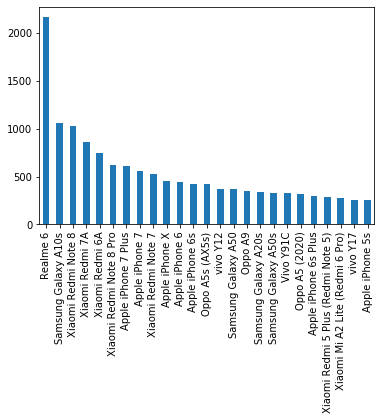

In [42]:
df_MP['product_type'].value_counts().head(25).plot(kind="bar")

<h1>5.Jenis produk apa yang termasuk dalam 3 produk teratas dalam penjualan?</h1>

In [44]:
threeUp=df_MP.groupby('product_type')['total_sold'].sum().sort_values(ascending=False)
threeUp.head(3)

product_type
Samsung Galaxy A10s    525852
Xiaomi Redmi 6A        332426
Realme 6               277352
Name: total_sold, dtype: int64

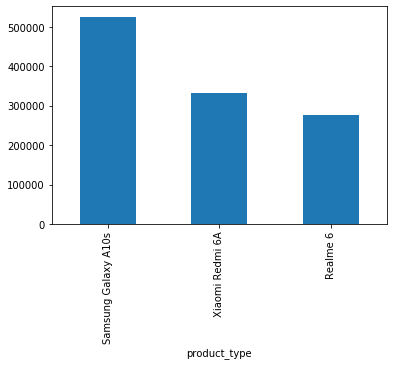

In [45]:
threeUp.head(3).plot(kind='bar')

<h1>6.Produk teratas pertama:harga rata-rata,variasi harga jual visualisasi distribusi dengan histogram</h1>

In [47]:
threeUp.head(1)

product_type
Samsung Galaxy A10s    525852
Name: total_sold, dtype: int64

In [48]:
samsung=df_MP[df_MP['product_type']=='Samsung Galaxy A10s']
samsung

,date,sku_name,product_id,merchant_code,merchant_badge,product_type,merchant_city,cod,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
2554,2020-04-08,Samsung A10S 2/32 garansi resmi - Random,E159,676.0,RM,Samsung Galaxy A10s,Kab. Bantul,False,1581000,0,1581000,1,19,100,50,186
2555,2020-04-26,SAMSUNG GALAXY A10S 2GB 32GB GARANSI RESMI SEIN,E160,43.0,RM,Samsung Galaxy A10s,Kota Administrasi Jakarta Utara,False,1650000,17,0,0,2,99,25,26
2556,2020-04-18,Samsung A10s New Garansi Resmi,F122,677.0,RM,Samsung Galaxy A10s,Kab. Bantul,False,1609400,10,0,0,2,100,21,73
2557,2020-04-15,SAMSUNG GALAXY A10S - [2/32] - GARANSI RESMI S...,E161,678.0,RM,Samsung Galaxy A10s,Kota Administrasi Jakarta Utara,False,1589900,3,0,0,11,100,21,329
2558,2020-04-14,Samsung A10s New Garansi Resmi,F122,677.0,RM,Samsung Galaxy A10s,Kab. Bantul,False,1609400,10,0,0,7,100,21,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25326,2020-04-04,Samsung Galaxy A10s 2/32 RAM 2GB ROM 32GB GARA...,E3287,805.0,OS,Samsung Galaxy A10s,Kota Administrasi Jakarta Pusat,False,1621000,7,25936000,16,565,98,529,4100
25327,2020-04-06,Samsung Galaxy A10s 2/32 2GB 32GB Garansi Resm...,E328,819.0,OS,Samsung Galaxy A10s,Kota Administrasi Jakarta Pusat,False,1650000,8,3300000,2,236,94,35,241
25328,2020-04-18,Samsung Galaxy A10S Smartphone [32GB/ 2GB] Red...,E324,822.0,OS,Samsung Galaxy A10s,Kota Administrasi Jakarta Pusat,False,1629000,18,3258000,2,32,98,36,203
25329,2020-04-27,Samsung Galaxy A10S Smartphone [32GB/ 2GB] Bla...,E3281,822.0,OS,Samsung Galaxy A10s,Kota Administrasi Jakarta Pusat,False,1635000,20,0,0,663,99,203,1431


In [49]:
samsung.describe()

,merchant_code,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
count,1062.000000,1.062000e+03,1062.000000,1.062000e+03,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000
mean,2091.317326,1.622651e+06,10479.354049,5.119869e+06,3.180791,44.287194,98.691149,52.347458,495.152542
std,915.227777,4.856473e+04,101278.453939,2.278007e+07,14.239942,129.024256,2.087776,67.491241,626.638576
min,43.000000,1.575000e+06,0.000000,-5.286600e+07,-33.000000,0.000000,77.000000,1.000000,7.000000
25%,1593.250000,1.600000e+06,2.000000,0.000000e+00,0.000000,3.000000,98.000000,19.000000,120.250000
50%,2039.000000,1.610000e+06,4.000000,0.000000e+00,0.000000,9.000000,99.000000,33.000000,291.500000
75%,2135.000000,1.625000e+06,10.000000,1.617750e+06,1.000000,26.750000,100.000000,56.750000,611.250000
max,3894.000000,2.000000e+06,999960.000000,3.845380e+08,242.000000,1467.000000,100.000000,570.000000,4290.000000


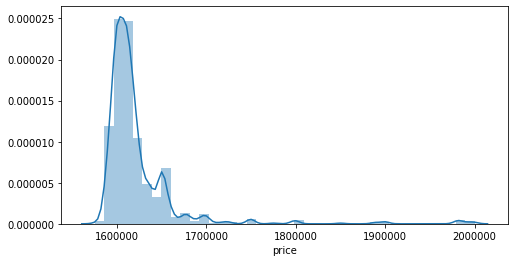

In [63]:
plt.figure(figsize=(8,4))
sns.distplot(samsung['price'],bins=40)

<h1>7.Filter dataset hanya dengan 'Samsung Galaxy A10s' dan temukan 3 kota pedagang terlaris,Tunjukkan dengan beberapa boxplot distribusi harga antara kota pedagang tersebut</h1>

In [65]:
samsung.groupby('merchant_city')['total_sold'].sum().sort_values(ascending=False).head(3)

merchant_city
Kota Administrasi Jakarta Pusat    71373
Kab. Sleman                        57790
Kab. Bantul                        46091
Name: total_sold, dtype: int64

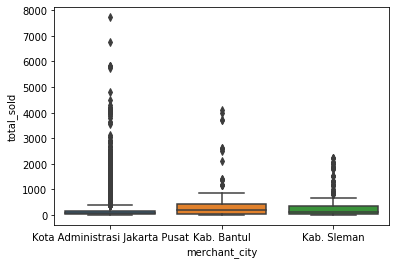

In [66]:
threeCity=['Kota Administrasi Jakarta Pusat','Kab. Sleman','Kab. Bantul']
filterCity=df_MP[df_MP['merchant_city'].isin(threeCity)]
box=sns.boxplot(x='merchant_city',y='total_sold',data=filterCity)

<h1>8.Ujilah perbedaan total_sold produk Samsung Galaxy A10 dengan Xiomi Redmi 6A menggunakan t-sample test</h1>

In [82]:
#melakukan iji t-test 2 sampel antara samsung galaxy a10 dan redmi 6a

from scipy.stats import ttest_ind
import numpy as np

product_samsung=df_MP[df_MP['product_type']=='Samsung Galaxy A10s']['total_sold']
product_redmi=df_MP[df_MP['product_type']=='Xiaomi Redmi 6A']['total_sold']

samsung_mean=np.mean(product_samsung)
redmi_mean=np.mean(product_redmi)

print('samsung mean value',samsung_mean)
print('redmi mean value',redmi_mean)

samsung_std=np.std(product_samsung)
redmi_std=np.std(product_redmi)

print('samsung std value :',samsung_std)
print('redmi std value :',redmi_std)

ttest,pval=ttest_ind(product_samsung,product_redmi)
print('p-value',pval)
if pval<0.05:
    print('we reject null hypotesis')
else:
    print('we accept null hypotesis')

samsung mean value 495.1525423728813
redmi mean value 445.0147255689424
samsung std value : 626.3434790554674
redmi std value : 580.394664272472
p-value 0.08442284533312362
we accept null hypotesis


<h1>8.Kesimpulan</h1>

Data ini menunjukkan data penjualan produk handphone,menurut data penjualan terjadi pada 11-03-2020 s/d 30-04-2020 kurang lebih selama dua bulan beberapa merk handphone yang banyak terjual pertama samsung galaxy a10s sebanyak 525.852,kedua xiaomi redmi 6a sebanyak 332.426 dan ketiga realme 6 sebanyak 277.352 pada samsung galaxy a10s tercepat 3 daerah pada kota asministrasi jakarta pusat kedua kab.sleman ketiga bantul ,sekarang mencoba membandingkan antara samsung galaxy a10s dan xiaomi redmi 6a untuk rata-rata hingga standart deviasi penjualan samsung lebih unggul daripada redmi